In [1]:
# Installing the google scrapper for scraping the data 
!pip install google_play_scraper transformers

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Scrapping the data from google playstore

In [3]:
# Storing the scraped data in dar_project
from google_play_scraper import reviews_all, Sort,app

dar_project = reviews_all(
    'com.dardoc',
    lang='en',
    sort=Sort.NEWEST,
    sleep_milliseconds=0
)


In [4]:
dar_project

[{'reviewId': 'f5249bb6-b4e0-4544-a901-fa3238dc3a46',
  'userName': 'Shahin Salah',
  'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocLzL2cMrVhr8NFLz4SVzQofc6xPdcq0mmtkWkMLctZ0gzEGfw=mo',
  'content': 'The team is fantastic. The support system is brilliant. The whatsapp team helped me so much considering numerous moving parts, especially for newborn kids. Highly recommend using Dardoc',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '7.4.0',
  'at': datetime.datetime(2024, 9, 26, 17, 42, 51),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '7.4.0'},
 {'reviewId': '97763919-536e-49f0-90da-f6d191e4d640',
  'userName': 'Zayed Bafaraj',
  'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocIGTm71ZWsIXtpl63oOl-f1ZB3XFuUFnnIh6zPROOkqgBFSGQ=mo',
  'content': '"I had my first experience with Dardoc for an IV drip, and it was truly worthwhile. Nurse Gellie was exceptionally professional, kind, and humble. I highly recommend trying their services."

In [5]:
# Convertingn the data into data frame
data=pd.json_normalize(dar_project)

In [6]:
# Checking first 10 raws
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,f5249bb6-b4e0-4544-a901-fa3238dc3a46,Shahin Salah,https://play-lh.googleusercontent.com/a/ACg8oc...,The team is fantastic. The support system is b...,5,0,7.4.0,2024-09-26 17:42:51,None,NaT,7.4.0
1,97763919-536e-49f0-90da-f6d191e4d640,Zayed Bafaraj,https://play-lh.googleusercontent.com/a/ACg8oc...,"""I had my first experience with Dardoc for an ...",5,0,7.4.0,2024-09-17 21:38:17,None,NaT,7.4.0
2,d3c461d2-9988-44db-901c-37ccd569c4eb,Claire Lawrence,https://play-lh.googleusercontent.com/a/ACg8oc...,I signed up for the DarDoc Weight Loss Program...,2,0,7.2.2,2024-06-14 11:19:03,None,NaT,7.2.2
3,28458e8a-9586-46a7-a433-468d88ec0bda,Roqie Dherel,https://play-lh.googleusercontent.com/a-/ALV-U...,Excellent service.,5,0,None,2024-04-16 02:35:32,None,NaT,None
4,40409f97-975c-4654-baeb-07f8d8d38284,Dr Zahra,https://play-lh.googleusercontent.com/a/ACg8oc...,The worse experience ever not recommended it t...,1,0,7.0.2,2024-04-11 16:17:07,None,NaT,7.0.2


In [7]:
'''
low_score_bucket=[]
for score in df['score']:
    if score<3:
        low_score_bucket.append(score)
print(len(low_score_bucket))
'''

"\nlow_score_bucket=[]\nfor score in df['score']:\n    if score<3:\n        low_score_bucket.append(score)\nprint(len(low_score_bucket))\n"

In [8]:
# basic information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              55 non-null     object        
 1   userName              55 non-null     object        
 2   userImage             55 non-null     object        
 3   content               55 non-null     object        
 4   score                 55 non-null     int64         
 5   thumbsUpCount         55 non-null     int64         
 6   reviewCreatedVersion  43 non-null     object        
 7   at                    55 non-null     datetime64[ns]
 8   replyContent          1 non-null      object        
 9   repliedAt             1 non-null      datetime64[ns]
 10  appVersion            43 non-null     object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 4.9+ KB


In [9]:
data.shape

(55, 11)

In [10]:
data.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')

In [11]:
# Droping the unnecessary columns thou am not droping the user name. The CS team might need the user name in future.
data= data.drop(columns=['reviewId','userImage'])


In [12]:
# Changing the column name
data.rename(columns={'at': 'date and time'}, inplace=True)

In [13]:
# adding feature for content count
data['Length'] = data['content'].apply(len)

In [14]:
data.isnull().sum()

userName                 0
content                  0
score                    0
thumbsUpCount            0
reviewCreatedVersion    12
date and time            0
replyContent            54
repliedAt               54
appVersion              12
Length                   0
dtype: int64

In [15]:
# Basic statistical insight of our data
data.describe()

,score,thumbsUpCount,Length
count,55.000000,55.000000,55.000000
mean,4.163636,1.309091,96.545455
std,1.524657,2.107067,117.676553
min,1.000000,0.000000,4.000000
25%,4.500000,0.000000,20.000000
50%,5.000000,1.000000,41.000000
75%,5.000000,1.500000,142.500000
max,5.000000,13.000000,499.000000


In [16]:
# Basic statistical insight of our objects

data.describe(include=object)

,userName,content,reviewCreatedVersion,replyContent,appVersion
count,55,55,43,1,43
unique,55,51,25,1,25
top,Shahin Salah,Very good,3.3.0,"Sorry, our database doesn't recognise you as o...",3.3.0
freq,1,4,10,1,10


In [17]:
data.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,date and time,replyContent,repliedAt,appVersion,Length
0,Shahin Salah,The team is fantastic. The support system is b...,5,0,7.4.0,2024-09-26 17:42:51,None,NaT,7.4.0,185
1,Zayed Bafaraj,"""I had my first experience with Dardoc for an ...",5,0,7.4.0,2024-09-17 21:38:17,None,NaT,7.4.0,189
2,Claire Lawrence,I signed up for the DarDoc Weight Loss Program...,2,0,7.2.2,2024-06-14 11:19:03,None,NaT,7.2.2,246
3,Roqie Dherel,Excellent service.,5,0,None,2024-04-16 02:35:32,None,NaT,None,18
4,Dr Zahra,The worse experience ever not recommended it t...,1,0,7.0.2,2024-04-11 16:17:07,None,NaT,7.0.2,54


# EDA

#### Analyzing the ratings

In [18]:
# To count each Ratings 
score_count=data['score'].value_counts()
print(score_count)

5    41
1     8
2     3
3     2
4     1
Name: score, dtype: int64


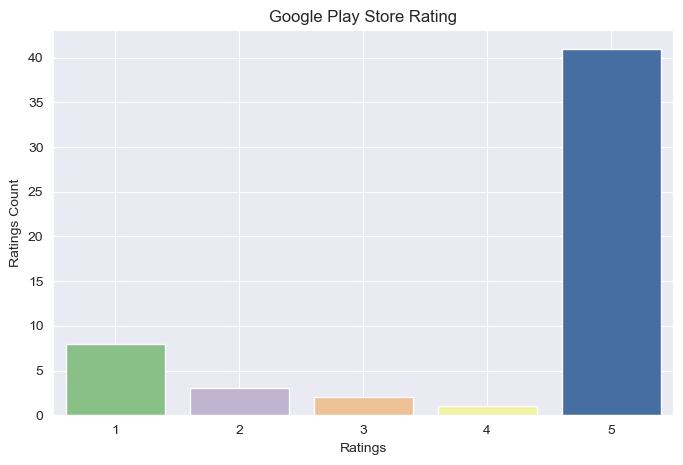

In [19]:
# Let's plot the bar chart
sns.set_style("darkgrid")
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='score',palette='Accent')
plt.title("Google Play Store Rating")
plt.xlabel('Ratings')
plt.ylabel('Ratings Count')
plt.grid(True)
plt.show()

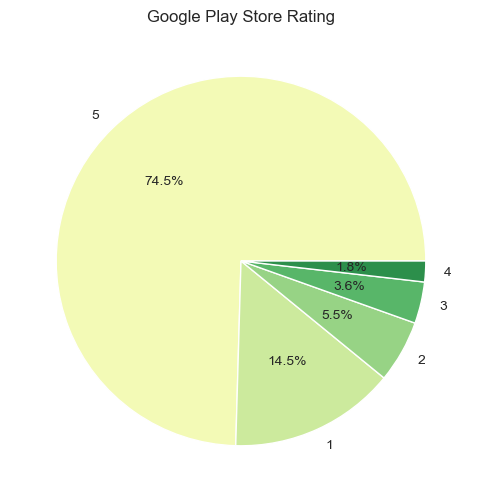

In [20]:
# Ploting the pie chart
plt.figure(figsize=(8,6))
plt.pie(score_count, labels=score_count.index, autopct='%1.1f%%', colors=sns.color_palette('YlGn'))
plt.title('Google Play Store Rating')
plt.show()

#### The pie chart reveals that a significant majority of users (74.5%) rated the app with a perfect score of 5 stars, indicating high satisfaction. Ratings of 4 stars account for 14.5%, while 3 stars represent 5.5%. The lower ratings (2 stars and below) show minimal feedback, with 1 star at 1.8% . Overall, this suggests that users generally have a positive experience with the app, although there is a small percentage of less favorable reviews.

In [21]:
# Creating new column "Score_scale" which classifies the rating into (5-4)Positive , (3)Nuteral, (1-2)negative

# Defining conditions for classification
conditions = [
    (data['score'] >= 4),  # 5-4 stars
    (data['score'] == 3),  # 3 stars
    (data['score'] <= 2)   # 1-2 stars
]

# Defining the corresponding classifications
choices = ['Positive', 'Neutral', 'Negative']

# Creating the new column 'Score_scale' using np.select
data['Score_scale'] = np.select(conditions, choices)

# Preview the updated dataframe
data.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,date and time,replyContent,repliedAt,appVersion,Length,Score_scale
0,Shahin Salah,The team is fantastic. The support system is b...,5,0,7.4.0,2024-09-26 17:42:51,None,NaT,7.4.0,185,Positive
1,Zayed Bafaraj,"""I had my first experience with Dardoc for an ...",5,0,7.4.0,2024-09-17 21:38:17,None,NaT,7.4.0,189,Positive
2,Claire Lawrence,I signed up for the DarDoc Weight Loss Program...,2,0,7.2.2,2024-06-14 11:19:03,None,NaT,7.2.2,246,Negative
3,Roqie Dherel,Excellent service.,5,0,None,2024-04-16 02:35:32,None,NaT,None,18,Positive
4,Dr Zahra,The worse experience ever not recommended it t...,1,0,7.0.2,2024-04-11 16:17:07,None,NaT,7.0.2,54,Negative


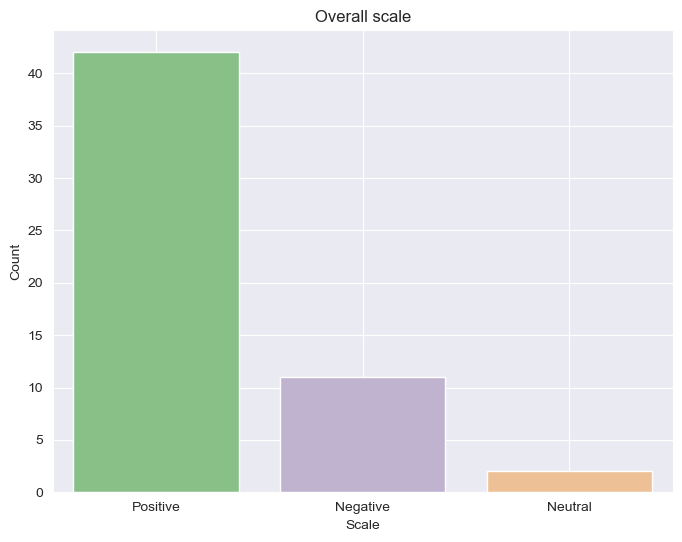

In [22]:
# Ploting the scale 
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='Score_scale',palette='Accent')
plt.title('Overall scale')
plt.xlabel('Scale')
plt.ylabel('Count')
plt.grid(True)
plt.show()

#### Let's analyze which customer tends to write more words based on the Score_scale

In [23]:
# Group by 'Score_scale' and calculate the mean of 'Length'
average_length_per_scale = data.groupby('Score_scale')['Length'].median().reset_index()
total_length_per_scale = data.groupby('Score_scale')['Length'].sum().reset_index()

# Display the result
print(average_length_per_scale)
print(total_length_per_scale)


  Score_scale  Length
0    Negative   112.0
1     Neutral   303.5
2    Positive    34.0
  Score_scale  Length
0    Negative    1619
1     Neutral     607
2    Positive    3084


#### Observation:- Averagely unsatisfied people tend to write detailed review thou the distribution of positive customer is higher  

In [24]:
pivot_table = data.pivot_table(index='appVersion', columns='Score_scale', aggfunc='size', fill_value=0)
print(pivot_table)


Score_scale  Negative  Neutral  Positive
appVersion                              
1.0.32              0        0         1
1.0.33              0        0         1
2.0.13              1        0         0
2.0.18              0        0         2
2.0.4               0        0         3
2.0.8               0        0         2
2.0.9               0        0         1
3.0.2               0        0         1
3.0.4               0        0         3
3.2.3               0        1         0
3.3.0               0        0        10
3.5.3               1        0         0
3.5.7               0        0         3
4.1.2               0        0         1
4.2.0               0        0         1
4.2.2               0        0         1
4.5.0               0        1         0
5.0                 1        0         0
5.0.1               1        0         0
5.2.8               0        0         1
6.0.2               0        0         1
6.0.4               0        0         1
7.0.2           

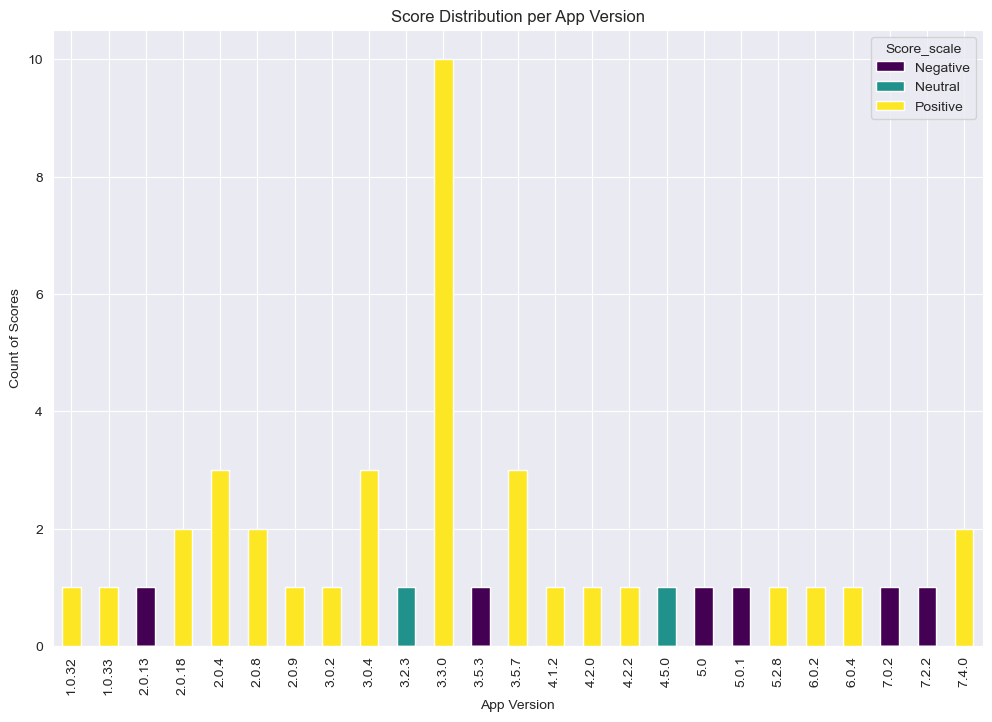

In [25]:
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Score Distribution per App Version')
plt.xlabel('App Version')
plt.ylabel('Count of Scores')
plt.xticks(rotation=90)
plt.show()

#### In the chart, which represents the distribution of customer feedback (Positive, Neutral, and Negative) across different app versions, we can observe the following:

#### Positive Feedback: This dominates most app versions, especially in version 3.3.0, where the count of positive reviews is significantly higher.
#### Neutral Feedback: It's scattered with relatively low counts across versions like 3.2.3 and 4.5.0.
#### Negative Feedback: Present in many versions, but less common compared to positive feedback. It is notable in versions like 1.0.13 and 6.0.4.
#### This distribution helps identify how different versions have been received and might guide further app improvement.

In [26]:
# Analysing the version which get the negative rating 
Negative_review_version = data.loc[data['Score_scale'] == 'Negative']

Negative_review_version.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,date and time,replyContent,repliedAt,appVersion,Length,Score_scale
2,Claire Lawrence,I signed up for the DarDoc Weight Loss Program...,2,0,7.2.2,2024-06-14 11:19:03,None,NaT,7.2.2,246,Negative
4,Dr Zahra,The worse experience ever not recommended it t...,1,0,7.0.2,2024-04-11 16:17:07,None,NaT,7.0.2,54,Negative
7,M.S,The app isnt loading after the update,1,0,None,2023-12-29 23:55:12,None,NaT,None,37,Negative
9,Reno Mindemann,I used one health test of DarDoc as I had some...,1,1,5.0.1,2023-09-30 21:35:21,None,NaT,5.0.1,236,Negative
10,Fibi Bee,NOT ABLE TO BOOK AN APPOINTMENT,2,0,5.0,2023-09-15 02:18:10,None,NaT,5.0,31,Negative


In [27]:
Score_count= Negative_review_version['score'].value_counts()
print(Score_count)

1    8
2    3
Name: score, dtype: int64


In [35]:
Negative_review_version.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,date and time,replyContent,repliedAt,appVersion,Length,Score_scale
2,Claire Lawrence,I signed up for the DarDoc Weight Loss Program...,2,0,7.2.2,2024-06-14 11:19:03,None,NaT,7.2.2,246,Negative
4,Dr Zahra,The worse experience ever not recommended it t...,1,0,7.0.2,2024-04-11 16:17:07,None,NaT,7.0.2,54,Negative
7,M.S,The app isnt loading after the update,1,0,None,2023-12-29 23:55:12,None,NaT,None,37,Negative
9,Reno Mindemann,I used one health test of DarDoc as I had some...,1,1,5.0.1,2023-09-30 21:35:21,None,NaT,5.0.1,236,Negative
10,Fibi Bee,NOT ABLE TO BOOK AN APPOINTMENT,2,0,5.0,2023-09-15 02:18:10,None,NaT,5.0,31,Negative


In [28]:
for review in Negative_review_version['content']:
    print(review + '\n')

I signed up for the DarDoc Weight Loss Program Subscription. Unfortunately the app does not work properly for the Weight Loss Program. The app crashes or does not load properly and I had to use the WhatsApp help team for each step of the program.

The worse experience ever not recommended it to anyone

The app isnt loading after the update

I used one health test of DarDoc as I had some symptoms and their Lab produced a false negative result. Going to another service provider I got the positive result. This delayed me in receiving prescription meds by one week. Don't use!!

NOT ABLE TO BOOK AN APPOINTMENT

Your ID scanner doesnt work. Quite disappointing. We really needed your service today but cannot use coz of that

Bug in the app

From a UX designer perspective, the entire experience is off-putting. There should be a website link opening when a person clicks the link and not forcing the app on user. Then forcing them to sign in n add address n phone. The simple thing that a user sho